# 带有阿罗证券的竞争均衡

## 引言

本讲座介绍了Python代码，用于实验具有以下特征的无限期纯交换经济的竞争均衡：

* 异质代理人

* 单一消费品的禀赋，是共同马尔可夫状态的个人特定函数

* 一期阿罗状态或有证券的完全市场

* 在宏观经济学和金融学中常用的贴现期望效用偏好

* 代理人之间具有共同的期望效用偏好

* 代理人之间具有共同的信念

* 一个具有固定相对风险厌恶度(CRRA)的单期效用函数，它意味着存在一个代表性消费者，其消费过程可以代入单步Arrow证券定价核的公式中，从而在确定财富均衡分配之前确定均衡价格

* 个体在禀赋上的差异使他们想要在时间和马尔可夫状态之间重新配置消费品

我们施加限制条件，使我们能够将竞争均衡的价格和数量**贝尔曼化**

我们使用贝尔曼方程来描述

* 资产价格

* 每个人的持续财富水平

* 每个人的逐状态自然债务限额


在介绍模型的过程中，我们将遇到这些重要概念

* 在此类模型中广泛使用的**解算子**

* 有限期限经济中**借贷限制**的缺失

* 无限期经济中所需的**各州借贷限制**

* **迭代期望法则**的对应概念，称为**迭代值法则**

* 在竞争均衡中存在的**状态变量退化**现象，这为各种解算子的出现铺平了道路

## 设定

实际上，本讲座实现了 Ljungqvist 和 Sargent {cite}`Ljungqvist2012` 第9.3.3节中所提出模型的 Python 版本。

### 偏好和禀赋

在每个时期 $t\geq 0$，一个随机事件 $s_t \in {\bf S}$ 会实现。

让我们用 $s^t = [s_0, s_{1}, \ldots, s_{t-1}, s_t]$ 来表示直到时间 t 的事件历史。

(有时我们会无意中颠倒记录顺序，将历史表示为 $s^t = [s_t, s_{t-1}, \ldots, s_1, s_0]$。)

观察到特定事件序列 $s^t$ 的无条件概率由概率测度 $\pi_t(s^t)$ 给出。

对于 $t > \tau$，我们写出概率

将观察到的 $s^t$ 在已知 $s^\tau$ 的条件下表示为 $\pi_t(s^t\vert s^\tau)$。

我们假设交易发生在观察到 $s_0$ 之后，这通过设定初始给定值 $s_0$ 的 $\pi_0(s_0)=1$ 来表示。

在本讲中，我们将遵循大多数宏观经济学和计量经济学的做法，假设 $\pi_t(s^t)$ 是由马尔可夫过程产生的。

有 $K$ 个消费者，记为 $k=1, \ldots , K$。

消费者 $k$ 拥有一个随机禀赋，即一种商品 $y_t^k(s^t)$，其取决于历史 $s^t$。

历史 $s^t$ 是公开可观察的。

消费者 $k$ 购买一个依赖于历史的消费计划 $c^k = \{c_t^k(s^t)\}_{t=0}^\infty$

消费者 $k$ 对消费计划的排序为

$$ U_k(c^k) =
   \sum_{t=0}^\infty \sum_{s^t} \beta^t u_k[c_t^k(s^t)]
   \pi_t(s^t),
  $$

其中 $0 < \beta < 1$。

右边等于 $ E_0 \sum_{t=0}^\infty \beta^t u_k(c_t^k) $，其中 $E_0$ 是数学期望算子，以 $s_0$ 为条件。

这里 $u_k(c)$ 是一个关于消费 $c\geq 0$ 的递增、二次连续可微、严格凹的函数。

个人 $k$ 的效用函数满足 Inada 条件

$$ \lim_{c \downarrow 0} u'_k(c) = +\infty.$$

这个条件意味着每个代理人在每个日期-历史对 $(t, s^t)$ 都会选择严格正的消费。

这些内部解使我们能够将分析限制在等式成立的欧拉方程上，并且保证在像我们这样的经济中，**自然债务限制**在连续交易箭头证券时不会受到约束。

我们采用宏观经济学中常用的假设，即消费者对所有的 $t$ 和 $s^t$ 共享相同的概率 $\pi_t(s^t)$。

一个**可行配置**满足

$$
\sum_i c_t^k(s^t) \leq \sum_i y_t^k(s^t)
$$

对所有的 $t$ 和所有的 $s^t$ 成立。

## 递归表述

根据Ljungqvist和Sargent {cite}`Ljungqvist2012`第9章第9.3.3节的描述,我们建立了一个具有完整一期Arrow证券市场的纯交换经济的竞争均衡。

当禀赋$y^k(s)$都是共同马尔可夫状态$s$的函数时,定价核心采用$Q(s'|s)$的形式,其中$Q(s'|s)$是在t时刻马尔可夫状态为$s$时,t+1时刻状态$s'$中一单位消费的价格。

这使我们能够对消费者优化问题提供递归表述。

消费者$k$在t时刻的状态是其金融财富$a^k_t$和马尔可夫状态$s_t$。

令$v^k(a,s)$为消费者$k$从状态$(a,s)$开始的问题的最优值。

* $v^k(a,s)$是当前拥有金融财富$a$的消费者$k$在马尔可夫状态$s$下能获得的最大期望贴现效用。

最优值函数满足贝尔曼方程

$$

v^k(a, s) = \max_{c, \hat a(s')} \left\{ u_k(c) + \beta \sum_{s'} v^k[\hat a(s'),s'] \pi (s' | s) \right\}
$$

其中最大化受预算约束

$$
c + \sum_{s'} \hat a(s') Q(s' | s)
     \leq  y^k(s) + a
     $$

以及约束条件

$$
\begin{aligned}
c & \geq 0, \\
           -   \hat a(s') & \leq \bar A^k(s'), \hskip.5cm \forall s' \in {\bf S}
\end{aligned}
$$

第二个约束显然是一组逐状态的债务限制。

注意，求解贝尔曼方程的值函数和决策规则隐含地依赖于定价核$Q(\cdot \vert \cdot)$，因为它出现在代理人的预算约束中。

使用贝尔曼方程右侧问题的一阶条件和Benveniste-Scheinkman公式并重新整理得到

$$
Q(s_{t+1} | s_t ) = {\beta u'_k(c_{t+1}^k) \pi(s_{t+1} | s_t)
                 \over u'_k(c_t^k) },
                 $$

其中$c_t^k = c^k(s_t)$

且 $c_{t+1}^k = c^k(s_{t+1})$。

**递归竞争均衡**是指
一个初始财富分布 $\vec a_0$，一组借贷限额 $\{\bar A^k(s)\}_{k=1}^K$，
一个定价核 $Q(s' | s)$，一组价值函数 $\{v^k(a,s)\}_{k=1}^K$，以及
决策规则 $\{c^k(s), \hat a^k(s)\}_{k=1}^K$，使得

* 各状态下的借贷约束满足递归式

$$
\bar A^k(s) = y^k(s) + \sum_{s'} Q(s'|s) \bar A^k(s')
$$

* 对于所有 $k$，给定
$a^k_0$、$\bar A^k(s)$ 和定价核，价值函数和决策规则
求解消费者问题；

* 对于 $\{s_t\}_{t=0}^\infty$ 的所有实现，消费和资产
组合 $\{\{c^k_t,$
$\{\hat a^k_{t+1}(s')\}_{s'}\}_k\}_t$ 满足 $\sum_k c^k_t = \sum_k y^k(s_t)$ 且
对所有 $t$ 和 $s'$ 有 $\sum_k \hat a_{t+1}^k(s') = 0$。

* 初始金融财富向量 $\vec a_0$ 满足 $\sum_{k=1}^K a_0^k = 0$。

第三个条件断言在所有马尔可夫状态下净总索赔为零。

第四个条件断言经济是封闭的,并且从净总索赔为零的情况开始。

## 状态变量退化

请参见 Ljungqvist 和 Sargent {cite}`Ljungqvist2012` 对交易时序协议的描述,该协议与 Arrow-Debreu 的设想一致:

* 在时间 $0$ 时存在完整的市场,包含完整的历史 $s^t$ 条件下所有日期消费的索赔菜单,所有交易都在时间零发生
* 所有交易一次性地在时间 $0$ 发生

如果递归竞争均衡中的分配和定价核 $Q$ 要与相应的完全市场经济中的均衡分配和价格体系保持一致(在该经济中存在这种历史条件商品且所有交易在时间 $0$ 发生),我们必须要求 $k = 1, \ldots , K$ 时 $a_0^k = 0$。

也就是说

在时间$0$时，每个代理人的消费现值等于其禀赋流的现值，这确保了在时间$0$发生所有交易的单一预算约束安排。

系统以所有$i$的$a_0^k =0$开始，这带来了一个显著的含义，我们称之为**状态变量退化**。

以下是我们所说的**状态变量退化**的含义：

尽管价值函数$v^k(a,s)$中出现了两个状态变量$a,s$，但在从初始马尔可夫状态$s_0$且$a_0^k = 0 \ \forall i$开始的递归竞争均衡中，会出现两个结果：

* 当马尔可夫状态$s_t$返回到$s_0$时，所有$i$的$a_0^k = 0$。

* 金融财富$a$是马尔可夫状态$s$的一个精确函数。

第一个发现表明，每个家庭都会周期性地回到其生命开始时的零金融财富状态。

第二个发现表明，在竞争均衡中，外生马尔可夫状态是我们追踪个体所需的全部信息。

金融财富变得多余，因为它对每个个体来说都是马尔可夫状态的精确函数。

这个结果严重依赖于箭头证券市场的完整性。

例如，在本讲座{doc}`艾亚加里模型 <aiyagari>`的不完整市场设置中，这一结果并不成立。

## 马尔可夫资产价格

让我们从简要总结在马尔可夫环境下计算资产价格的公式开始。

该设置假定以下基础架构：

* 马尔可夫状态：$s \in S = \left[\bar{s}_1, \ldots, \bar{s}_n \right]$，由具有转移概率的n状态马尔可夫链支配

$$
P_{ij} = \Pr \left\{s_{t+1} = \bar{s}_j \mid s_t = \bar{s}_i \right\}
$$

* 一组$h=1,\ldots, H$个$n \times 1$向量，表示$H$个资产在状态$s$下的支付$d^h\left(s\right)$

* 一个 $n \times n$ 矩阵定价核 $Q$ 用于一期箭头证券，其中 $Q_{ij}$ = 在时间 $t$ 状态 $s_t = \bar s_i$ 时，当 $s_{t+1} = \bar s_j$ 在时间 $t+1$ 时一单位消费的价格：

$$
Q_{ij} = {\textrm{Price}} \left\{s_{t+1} = \bar{s}_j \mid s_t = \bar{s}_i \right\}
$$

* 在状态 $i$ 中无风险一期债券的价格是 $R_i^{-1} = \sum_{j}Q_{i,j}$

* 在马尔可夫状态 $\bar s_i$ 中一期无风险债券的总回报率是 $R_i = (\sum_j Q_{i,j})^{-1}$

### 外生定价核

在这一点上，我们将把定价核 $Q$ 视为外生的，即由模型外部决定

两个例子是：

* $Q = \beta P$ 其中 $\beta \in (0,1)$

* $Q = S P$ 其中 $S$ 是一个 $n \times n$ 的*随机贴现因子*矩阵

我们将简要写下马尔可夫资产定价对两种类型资产的含义

* 在马尔可夫状态$s$和时间$t$时，一个**含红利**股票的价格，该股票使持有人在时间$t$开始时有权获得时间$t$的红利，并可选择在时间$t+1$出售资产。该价格显然满足$p^h(\bar s_i) = d^h(\bar s_i) + \sum_j Q_{ij} p^h(\bar s_j)$，这意味着向量$p^h$满足$p^h = d^h + Q p^h$，从而得出公式

$$
p^h = (I - Q)^{-1} d^h
$$

* 在马尔可夫状态$s$和时间$t$时，一个**除权**股票的价格，该股票使持有人在时间$t$结束时有权获得时间$t+1$的红利，并可选择在时间$t+1$出售股票。该价格为

$$
p^h = (I - Q)^{-1} Q d^h
$$

```{note}
矩阵几何级数$(I - Q)^{-1} = I + Q + Q^2 + \cdots$
是一个**预解算子**的例子。
```

下面，我们将描述一个包含一期箭头证券交易的均衡模型，其中定价核是内生的。

在构建我们的模型时，我们会反复遇到让我们想起资产定价公式的公式。

### 多步前向转移概率和定价核

$\ell$步前向转移概率$P^\ell$的$(i,j)$分量是

$$
Prob(s_{t+\ell} = \bar s_j | s_t = \bar s_i)   = P^{\ell}_{i,j}
$$

$\ell$步前向定价核$Q^\ell$的$(i,j)$分量是

$$
Q^{(\ell)}(s_{t+\ell} = \bar s_j | s_t = \bar s_i)   = Q^{\ell}_{i,j}
$$

我们将使用这些对象来说明资产定价理论中的一个有用性质。

### 迭代期望法则和迭代值法则

**迭代值法则**具有与**迭代期望法则**相平行的数学结构

在本讲座的马尔可夫设定中，我们可以很容易地描述其结构

回顾我们有限状态马尔可夫链的$j$步前向转移概率满足的以下递归关系：

$$

P_j(s_{t+j}| s_t)  = \sum_{s_{t+1}} P_{j-1}(s_{t+j}| s_{t+1}) P(s_{t+1} | s_t)
$$

我们可以使用这个递归来验证迭代期望法则，该法则用于计算随机变量$d(s_{t+j})$在$s_t$条件下的条件期望，通过以下等式链：

$$
\begin{aligned}
E \left[ E d(s_{t+j}) | s_{t+1} \right] | s_t
    & = \sum_{s_{t+1}} \left[ \sum_{s_{t+j}} d(s_{t+j}) P_{j-1}(s_{t+j}| s_{t+1} ) \right]         P(s_{t+1} | s_t) \\
 & = \sum_{s_{t+j}}  d(s_{t+j}) \left[ \sum_{s_{t+1}} P_{j-1} ( s_{t+j} |s_{t+1}) P(s_{t+1}| s_t) \right] \\
 & = \sum_{s_{t+j}} d(s_{t+j}) P_j (s_{t+j} | s_t ) \\
 & = E d(s_{t+j})| s_t
    \end{aligned}
$$

j步前向Arrow证券的定价核满足以下递归关系：

$$
Q_j(s_{t+j}| s_t)  = \sum_{s_{t+1}} Q_{j-1}(s_{t+j}| s_{t+1}) Q(s_{t+1} | s_t)
$$

在马尔可夫状态$s_t$下，时间$t+j$的支付$d(s_{t+j})$在时间$t$的**价值**是

$$

V(d(s_{t+j})|s_t) = \sum_{s_{t+j}} d(s_{t+j}) Q_j(s_{t+j}| s_t)
$$

**迭代值法则**指出

$$
V \left[ V (d(s_{t+j}) | s_{t+1}) \right] | s_t  =   V(d(s_{t+j}))| s_t
$$

我们通过以下一系列不等式来验证它，这些不等式与我们用来验证迭代期望法则的不等式相对应：

$$
\begin{aligned}
V \left[ V  ( d(s_{t+j}) | s_{t+1} ) \right] | s_t
    & = \sum_{s_{t+1}} \left[ \sum_{s_{t+j}} d(s_{t+j}) Q_{j-1}(s_{t+j}| s_{t+1} ) \right]         Q(s_{t+1} | s_t) \\
 & = \sum_{s_{t+j}}  d(s_{t+j}) \left[ \sum_{s_{t+1}} Q_{j-1} ( s_{t+j} |s_{t+1}) Q(s_{t+1}| s_t) \right] \\
 & = \sum_{s_{t+j}} d(s_{t+j}) Q_j (s_{t+j} | s_t ) \\
 & = E V(d(s_{t+j}))| s_t
    \end{aligned}
$$

## 一般均衡

现在我们准备进行一些有趣的计算。

我们发现从分析性的**输入**和**输出**角度来思考我们的一般均衡理论很有意思。

### 输入

* Markov状态：$s \in S = \left[\bar{s}_1, \ldots, \bar{s}_n \right]$，由具有转移概率的$n$状态马尔可夫链控制

$$
P_{ij} = \Pr \left\{s_{t+1} = \bar{s}_j \mid s_t = \bar{s}_i \right\}
$$

* 个体$k$禀赋的$K \times 1$向量集合：$y^k\left(s\right), k=1,\ldots, K$

* 总禀赋的$n \times 1$向量：$y\left(s\right) \equiv \sum_{k=1}^K y^k\left(s\right)$

* 个体$k$消费的$K \times 1$向量集合：$c^k\left(s\right), k=1,\ldots, K$

* 对于$s \in S$的可行消费分配限制集合：

$$
c\left(s\right)= \sum_{k=1}^K c^k\left(s\right)
\leq  y\left(s\right)
$$

* 偏好：各主体共同的效用函数$ E_0 \sum_{t=0}^\infty \beta^t u(c^k_t) $，具有CRRA单期效用函数$u\left(c\right)$和贴现因子$\beta \in (0,1)$

单期效用函数为

$$
u \left(c\right) = \frac{c^{1-\gamma}}{1-\gamma}
$$

因此

$$

u^\prime \left(c\right) = c^{-\gamma}
$$

### 输出

* 一个 $n \times n$ 矩阵定价核 $Q$，用于一期箭头证券，其中 $Q_{ij}$ = 在时间 $t$ 状态 $s_t = \bar s_i$ 时，购买在 $t+1$ 时刻状态 $s_{t+1} = \bar s_j$ 时一单位消费的价格

* 纯交换，因此 $c\left(s\right) = y\left(s\right)$

* 一个 $K \times 1$ 的财富分布向量 $\alpha$，$\alpha_k \geq 0, \sum_{k=1}^K \alpha_k =1$

* 一组 $n \times 1$ 的个人 $k$ 消费向量：$c^k\left(s\right), k=1,\ldots, K$

### $Q$ 是定价核

对于任意代理人 $k \in \left[1, \ldots, K\right]$，在均衡配置下，一期箭头证券的定价核满足

$$
Q_{ij} = \beta \left(\frac{c^k\left(\bar{s}_j\right)}{c^k\left(\bar{s}_i\right)}\right)^{-\gamma} P_{ij}
$$

其中 $Q$ 是一个 $n \times n$ 矩阵

这来自代理人 $k$ 的一阶必要条件。

但是在我们假设的CRRA偏好下，个人消费与总消费成比例变化，因此也与总禀赋成比例变化。

  * 这是我们的偏好设定的结果，意味着**恩格尔曲线**在财富方面是仿射的，因此满足**戈尔曼聚合**的条件

因此，

$$
c^k \left(s\right) = \alpha_k c\left(s\right) = \alpha_k y\left(s\right)
$$

对于任意形式为$K \times 1$向量$\alpha$的**财富分配**，满足：

$$ \alpha_k \in \left(0, 1\right), \quad \sum_{k=1}^K \alpha_k = 1 $$

这意味着我们可以通过以下公式计算定价核：

$$
Q_{ij} = \beta \left(\frac{y_j}{y_i}\right)^{-\gamma} P_{ij}
$$ (eq:Qformula)

注意$Q_{ij}$与向量$\alpha$无关。

**关键发现：**我们可以在计算**财富分配**之前计算竞争均衡**价格**。

### 数值

在计算出均衡定价核$Q$后，我们可以计算几个在表示或构建个体家庭最优问题解时所需的**值**。

我们用一个$K \times 1$向量表示在马尔可夫状态$s$下代理人禀赋的状态依赖值：

$$
A\left(s\right)=\left[\begin{array}{c}
A^{1}\left(s\right)\\
 \vdots\\
A^{K}\left(s\right)
\end{array}\right], \quad s \in \left[\bar{s}_1, \ldots, \bar{s}_n\right]
$$

以及一个$n \times 1$向量表示每个个体$k$的持续禀赋值：

$$
A^{k}=\left[\begin{array}{c}
A^{k}\left(\bar{s}_{1}\right)\\
\vdots\\
A^{k}\left(\bar{s}_{n}\right)
\end{array}\right], \quad k \in \left[1, \ldots, K\right]
$$

消费者$k$的$A^k$满足：

$$
A^k = \left[I - Q\right]^{-1} \left[ y^k\right]
$$

其中

$$
y^{k}=\left[\begin{array}{c}
y^{k}\left(\bar{s}_{1}\right)\\
\vdots\\
y^{k}\left(\bar{s}_{n}\right)
\end{array}\right] \equiv \begin{bmatrix} y^k_1 \cr \vdots \cr y^k_n \end{bmatrix}

$$


在具有一期阿罗证券序列交易的**无限期限**经济的竞争均衡中，$A^k(s)$作为**债务限制**的状态向量，限制个人$k$在$t$时刻可以发行的、在$t+1$时刻在状态$s$下支付的一期阿罗证券数量。


这些通常被称为**自然债务限制**。

显然，它们等于个人$k$即使永远不消费任何商品也能偿还的最大金额。

**注意：**如果我们在零消费处有一个Inada条件，或者仅仅规定消费必须非负，那么在具有一期阿罗证券序列交易的**有限期限**经济中，就不需要施加自然债务限制。详见下文关于有限期限经济的部分。



### 延续财富

延续财富在将具有完整一期阿罗证券序列交易的竞争均衡贝尔曼化过程中扮演着重要角色。

我们用 $K \times 1$ 向量表示马尔可夫状态 $s$ 下的状态依赖延续财富：

$$
\psi\left(s\right)=\left[\begin{array}{c}
\psi^{1}\left(s\right)\\
\vdots\\
\psi^{K}\left(s\right)
\end{array}\right], \quad s \in \left[\bar{s}_1, \ldots, \bar{s}_n\right]
$$

对每个个体 $k$ 的延续财富用 $n \times 1$ 向量表示：

$$
\psi^{k}=\left[\begin{array}{c}
\psi^{k}\left(\bar{s}_{1}\right)\\
\vdots\\
\psi^{k}\left(\bar{s}_{n}\right)
\end{array}\right], \quad k \in \left[1, \ldots, K\right]
$$

消费者 $k$ 的延续财富 $\psi^k$ 满足：

$$
\psi^k = \left[I - Q\right]^{-1} \left[\alpha_k y - y^k\right]
$$ (eq:continwealth)

其中：

$$
y^{k}=\left[\begin{array}{c}
y^{k}\left(\bar{s}_{1}\right)\\
\vdots\\
y^{k}\left(\bar{s}_{n}\right)
\end{array}\right],\quad y=\left[\begin{array}{c}
y\left(\bar{s}_{1}\right)\\
\vdots\\
y\left(\bar{s}_{n}\right)
\end{array}\right]
$$

注意 $\sum_{k=1}^K \psi^k = {0}_{n \times 1}$。

**注释：** 在初始状态 $s_0 \in \begin{bmatrix} \bar s_1, \ldots, \bar s_n \end{bmatrix}$ 时，所有代理人 $k = 1, \ldots, K$ 的延续财富 $\psi^k(s_0) = 0$。这表明在时间 $0$、状态 $s_0$ 时，经济中的所有代理人都没有债务和金融资产。

**注释：** 请注意，当马尔可夫状态回到时间 $0$ 时的任何值 $s_0$ 时，所有代理人的延续财富都会周期性地回到零。

### 最优投资组合

该模型的一个巧妙特点是，k 类型代理人的最优投资组合等于我们刚刚计算的延续财富。

因此，k 类代理人在下一期对箭头证券的逐状态购买仅取决于下一期的马尔可夫状态，且等于

$$
a_k(s) = \psi^k(s), \quad s \in \left[\bar s_1, \ldots, \bar s_n \right]
$$ (eqn:optport)

### 均衡财富分布 $\alpha$

当初始状态为特定状态 $s_0 \in \left[\bar{s}_1, \ldots, \bar{s}_n\right]$ 时，

我们必须有

$$
\psi^k\left(s_0\right) = 0, \quad k=1, \ldots, K
$$

这意味着财富的均衡分布满足

$$
\alpha_k = \frac{V_z y^k}{V_z y}
$$ (eqn:alphakform)

其中 $V \equiv \left[I - Q\right]^{-1}$ 且 $z$ 是对应于初始状态 $s_0$ 的行索引。

由于 $\sum_{k=1}^K V_z y^k = V_z y$，所以 $\sum_{k=1}^K \alpha_k = 1$。

总之，计算竞争均衡的算法逻辑流程如下：

* 根据总体配置和公式 {eq}`eq:Qformula` 计算 $Q$

* 根据公式 {eq}`eqn:alphakform` 计算财富分布 $\alpha$

* 使用 $\alpha$ 为每个消费者 $k$ 分配总体禀赋在每个状态下的份额 $\alpha_k$

* 返回到依赖于 $\alpha$ 的公式 {eq}`eq:continwealth` 并计算延续财富

* 通过公式 {eq}`eqn:optport` 使代理人 $k$ 的投资组合在每个状态下等于其延续财富

我们还可以在完整的一期状态或有Arrow证券交易的竞争均衡中添加最优值函数的公式。

对消费者$k$，将最优值函数称为$J^k$。

对于现在研究的无限期限经济，公式为

$$ J^k = (I - \beta P)^{-1} u(\alpha_k y)  , \quad u(c) = \frac{c^{1-\gamma}}{1-\gamma} $$

其中$u(\alpha_k y)$被理解为一个向量。

## 有限期限

我们现在描述一个在$T+1$期内运行的有限期限版本经济，时期$t \in {\bf T} = \{ 0, 1, \ldots, T\}$。

因此，我们需要上述对象的$T+1$个对应物，但有一个重要的例外：我们不需要**借贷限制**。

* 对于有限期限经济，如果一期效用函数$u(c)$满足在零消费时边际效用为零的Inada条件，则不需要借贷限制。

* 在所有时间点 $t \in {\bf T}$ 上消费选择的非负性自动限制了借贷。


### 延续财富


我们用 $K \times 1$ 向量表示在时间 $t$ 马尔可夫状态 $s$ 下的状态依赖延续财富：

$$
\psi_t\left(s\right)=\left[\begin{array}{c}
\psi^{1}\left(s\right)\\
\vdots\\
\psi^{K}\left(s\right)
\end{array}\right], \quad s \in \left[\bar{s}_1, \ldots, \bar{s}_n\right]
$$

以及每个个体 $k$ 的 $n \times 1$ 延续财富向量：

$$
\psi_t^{k}=\left[\begin{array}{c}
\psi_t^{k}\left(\bar{s}_{1}\right)\\
\vdots\\
\psi_t^{k}\left(\bar{s}_{n}\right)
\end{array}\right], \quad k \in \left[1, \ldots, K\right]
$$



消费者 $k$ 的延续财富 $\psi^k$ 满足：

$$
\begin{aligned}
\psi_T^k & =  \left[\alpha_k y - y^k\right] \cr
\psi_{T-1}^k & =  \left[I + Q \right] \left[\alpha_k y - y^k\right] \cr
\vdots \quad  & \quad \quad \quad \vdots \cr

\psi_0^k  & = \left[I + Q + Q^2 + \cdots + Q^T \right] \left[\alpha_k y - y^k\right]
\end{aligned}
$$ (eq:vv)

其中

$$
y^{k}=\left[\begin{array}{c}
y^{k}\left(\bar{s}_{1}\right)\\
\vdots\\
y^{k}\left(\bar{s}_{n}\right)
\end{array}\right],\quad y=\left[\begin{array}{c}
y\left(\bar{s}_{1}\right)\\
\vdots\\
y\left(\bar{s}_{n}\right)
\end{array}\right]
$$

注意对于所有 $t \in {\bf T}$，$\sum_{k=1}^K \psi_t^k = {0}_{n \times 1}$。

**注解：** 在初始状态 $s_0 \in \begin{bmatrix} \bar s_1, \ldots, \bar s_n \end{bmatrix}$ 时，对于所有代理人 $k = 1, \ldots, K$，延续财富 $\psi_0^k(s_0) = 0$。这表明经济在时间0、状态$s_0$时，所有代理人都没有债务和金融资产。

**注解：** 注意当马尔可夫状态回到时间0时的初始值$s_0$时，所有代理人的延续财富都会回到零。如果马尔可夫链使初始状态$s_0$成为循环状态，这种情况会重复发生。

初始状态为特定状态$s_0 \in \left[\bar{s}_1, \ldots, \bar{s}_n\right]$时，我们必须有

$$
\psi_0^k\left(s_0\right) = 0, \quad k=1, \ldots, K
$$

这意味着财富的均衡分布满足

$$
\alpha_k = \frac{V_z y^k}{V_z y}
$$ (eq:w)

其中在我们的有限期限经济中

$$
 V = \left[I + Q + Q^2 + \cdots + Q^T \right]
$$ (eq:ww)

且$z$是对应于初始状态$s_0$的行索引。

由于$\sum_{k=1}^K V_z y^k = V_z y$，所以$\sum_{k=1}^K \alpha_k = 1$。

总之，以下是在我们的有限期限马尔可夫经济中计算带有阿罗证券的竞争均衡的算法逻辑流程：

* 根据总体配置和公式{eq}`eq:Qformula`计算$Q$

* 根据公式{eq}`eq:w`和{eq}`eq:ww`计算财富分布$\alpha$

* 使用$\alpha$，为每个消费者$k$分配总体禀赋在每个状态下的份额$\alpha_k$

* 返回到依赖于$\alpha$的公式{eq}`eq:vv`计算延续财富

* 将代理人$k$的投资组合与其延续财富在各个状态下对应

对于无限期限经济，价值函数的公式是

$$ J^k = (I - \beta P)^{-1} u(\alpha_k y)  , \quad u(c) = \frac{c^{1-\gamma}}{1-\gamma} $$

对于有限期限经济，公式是

$$ J_0^k = (I + \beta P + \cdots + \beta^T P^T) u(\alpha_k y) , $$

其中$u(\alpha_k y)$是一个向量。

## Python代码

现在我们准备深入一些Python代码。

像往常一样，我们先导入Python库。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']


In [2]:
np.set_printoptions(suppress=True)

首先，我们创建一个Python类来计算包含单期Arrow证券连续交易的竞争均衡对象。

除了无限期限经济外，该代码还可以处理以期限$T$为索引的有限期限经济。

在我们先看一些无限期限经济的例子之前，我们将研究一些有限期限经济的例子。

In [3]:
class RecurCompetitive:
    """
    表示具有单期Arrow证券的递归竞争经济的类。
    """

    def __init__(self,
                 s,        # 状态向量
                 P,        # 转移矩阵
                 ys,       # 禀赋 ys = [y1, y2, .., yI]
                 γ=0.5,    # 风险厌恶
                 β=0.98,   # 贴现率
                 T=None):  # 时间范围，无限期则为none

        # 偏好参数
        self.γ = γ
        self.β = β

        # 依赖于状态的变量
        self.s = s
        self.P = P
        self.ys = ys
        self.y = np.sum(ys, 1)

        # 维度
        self.n, self.K = ys.shape

        # 计算定价核
        self.Q = self.pricing_kernel()

        # 计算无风险一期债券价格
        self.PRF = self.price_risk_free_bond()

        # 计算无风险利率
        self.R = self.risk_free_rate()

        # V = [I - Q]^{-1} (无限期情况)
        if T is None:
            self.T = None
            self.V = np.empty((1, n, n))
            self.V[0] = np.linalg.inv(np.eye(n) - self.Q)
        # V = [I + Q + Q^2 + ... + Q^T] (有限期情况)
        else:
            self.T = T
            self.V = np.empty((T+1, n, n))
            self.V[0] = np.eye(n)

            Qt = np.eye(n)
            for t in range(1, T+1):
                Qt = Qt.dot(self.Q)
                self.V[t] = self.V[t-1] + Qt

        # 自然债务限制
        self.A = self.V[-1] @ ys

    def u(self, c):
        "CRRA效用函数"

        return c ** (1 - self.γ) / (1 - self.γ)

    def u_prime(self, c):
        "CRRA效用函数的一阶导数"

        return c ** (-self.γ)

    def pricing_kernel(self):
        "计算定价核矩阵Q"

        c = self.y

        n = self.n
        Q = np.empty((n, n))
        for i in range(n):
            for j in range(n):
                ratio = self.u_prime(c[j]) / self.u_prime(c[i])
                Q[i, j] = self.β * ratio * P[i, j]

        self.Q = Q

        return Q

    def wealth_distribution(self, s0_idx):
        "求解财富分布α"

        # 设置初始状态
        self.s0_idx = s0_idx

        # 简化符号
        n = self.n
        Q = self.Q
        y, ys = self.y, self.ys

        # V对应s0的行
        Vs0 = self.V[-1, s0_idx, :]
        α = Vs0 @ self.ys / (Vs0 @ self.y)

        self.α = α

        return α

    def continuation_wealths(self):
        "给定α，计算延续财富ψ"

        diff = np.empty((n, K))
        for k in range(K):
            diff[:, k] = self.α[k] * self.y - self.ys[:, k]

        ψ = self.V @ diff
        self.ψ = ψ

        return ψ

    def price_risk_free_bond(self):
        "给定Q，计算一期无风险债券价格"

        PRF = np.sum(self.Q, 0)
        self.PRF = PRF

        return PRF

    def risk_free_rate(self):
        "给定Q，计算一期无风险利率R"

        R = np.sum(self.Q, 0)
        R = np.reciprocal(R)
        self.R = R

        return R

    def value_functionss(self):
        "给定α，计算均衡中的最优价值函数J"

        n, T = self.n, self.T
        β = self.β
        P = self.P

        # 计算无限期情况下的(I - βP)^(-1)
        if T is None:
            P_seq = np.empty((1, n, n))
            P_seq[0] = np.linalg.inv(np.eye(n) - β * P)
        # 以及有限期情况下的(I + βP + ... + β^T P^T)
        else:
            P_seq = np.empty((T+1, n, n))
            P_seq[0] = np.eye(n)

            Pt = np.eye(n)
            for t in range(1, T+1):
                Pt = Pt.dot(P)
                P_seq[t] = P_seq[t-1] + Pt * β ** t

        # 计算矩阵[u(α_1 y), ..., u(α_K, y)]
        flow = np.empty((n, K))
        for k in range(K):
            flow[:, k] = self.u(self.α[k] * self.y)

        J = P_seq @ flow

        self.J = J

        return J

## 示例

我们将使用代码在几个示例经济中构建均衡对象。

我们的前几个示例将是无限期限经济。

我们的最后一个示例将是有限期限经济。

### 示例 1

请阅读前面课程中的默认参数值以及以下 Python 代码中的经济基本要素。

开始。

In [4]:
# dimensions
K, n = 2, 2

# states
s = np.array([0, 1])

# transition
P = np.array([[.5, .5], [.5, .5]])

# endowments
ys = np.empty((n, K))
ys[:, 0] = 1 - s       # y1
ys[:, 1] = s           # y2

In [5]:
ex1 = RecurCompetitive(s, P, ys)

In [6]:
# 禀赋
ex1.ys

array([[1., 0.],
       [0., 1.]])

In [7]:
# 定价核
ex1.Q

array([[0.49, 0.49],
       [0.49, 0.49]])

In [8]:
# 无风险利率 R
ex1.R

array([1.02040816, 1.02040816])

In [9]:
# 自然债务限制，A = [A1, A2, ..., AI]
ex1.A

array([[25.5, 24.5],
       [24.5, 25.5]])

In [10]:
# 当初始状态为状态1时
print(f'α = {ex1.wealth_distribution(s0_idx=0)}')
print(f'ψ = \n{ex1.continuation_wealths()}')
print(f'J = \n{ex1.value_functionss()}')

α = [0.51 0.49]
ψ = 
[[[-0.  0.]
  [ 1. -1.]]]
J = 
[[[71.41428429 70.        ]
  [71.41428429 70.        ]]]


In [11]:
# 当初始状态为状态2时
print(f'α = {ex1.wealth_distribution(s0_idx=1)}')
print(f'ψ = \n{ex1.continuation_wealths()}')
print(f'J = \n{ex1.value_functionss()}')

α = [0.49 0.51]
ψ = 
[[[-1.  1.]
  [ 0. -0.]]]
J = 
[[[70.         71.41428429]
  [70.         71.41428429]]]


### 示例 2

In [12]:
# 维度
K, n = 2, 2

# 状态
s = np.array([1, 2])

# 转移
P = np.array([[.5, .5], [.5, .5]])

# 禀赋
ys = np.empty((n, K))
ys[:, 0] = 1.5         # y1
ys[:, 1] = s           # y2

In [13]:
ex2 = RecurCompetitive(s, P, ys)

In [14]:
# 禀赋

print("ys = \n", ex2.ys)

# 定价核
print ("Q = \n", ex2.Q)

# 无风险利率 R
print("R = ", ex2.R)

ys = 
 [[1.5 1. ]
 [1.5 2. ]]
Q = 
 [[0.49       0.41412558]
 [0.57977582 0.49      ]]
R =  [0.93477529 1.10604104]


In [15]:
# 定价核
ex2.Q

array([[0.49      , 0.41412558],
       [0.57977582, 0.49      ]])

请注意示例经济1和2中的定价核心是不同的。

这源于示例1中状态1和状态2的总体禀赋的差异。

In [16]:
ex2.β * ex2.u_prime(3.5) / ex2.u_prime(2.5) * ex2.P[0,1]

0.4141255848169731

In [17]:
ex2.β * ex2.u_prime(2.5) / ex2.u_prime(3.5) * ex2.P[1,0]

0.5797758187437624

In [18]:
# 无风险利率 R
ex2.R

array([0.93477529, 1.10604104])

In [19]:
# 自然债务限制，A = [A1, A2, ..., AI]
ex2.A

array([[69.30941886, 66.91255848],
       [81.73318641, 79.98879094]])

In [20]:
# 当初始状态为状态1时
print(f'α = {ex2.wealth_distribution(s0_idx=0)}')
print(f'ψ = \n{ex2.continuation_wealths()}')
print(f'J = \n{ex2.value_functionss()}')

α = [0.50879763 0.49120237]
ψ = 
[[[-0.          0.        ]
  [ 0.55057195 -0.55057195]]]
J = 
[[[122.907875   120.76397493]
  [123.32114686 121.17003803]]]


In [21]:
# 当初始状态为状态1时
print(f'α = {ex2.wealth_distribution(s0_idx=1)}')
print(f'ψ = \n{ex2.continuation_wealths()}')
print(f'J = \n{ex2.value_functionss()}')

α = [0.50539319 0.49460681]
ψ = 
[[[-0.46375886  0.46375886]
  [ 0.         -0.        ]]]
J = 
[[[122.49598809 121.18174895]
  [122.907875   121.58921679]]]


### 示例 3

In [22]:
# 维度
K, n = 2, 2

# 状态
s = np.array([1, 2])

# 转移
λ = 0.9
P = np.array([[1-λ, λ], [0, 1]])

# 禀赋
ys = np.empty((n, K))
ys[:, 0] = [1, 0]         # y1
ys[:, 1] = [0, 1]         # y2

In [23]:
ex3 = RecurCompetitive(s, P, ys)

In [24]:
# 禀赋

print("ys = ", ex3.ys)

# 定价核
print ("Q = ", ex3.Q)

# 无风险利率 R
print("R = ", ex3.R)

ys =  [[1. 0.]
 [0. 1.]]
Q =  [[0.098 0.882]
 [0.    0.98 ]]
R =  [10.20408163  0.53705693]


In [25]:
# 定价核
ex3.Q

array([[0.098, 0.882],
       [0.   , 0.98 ]])

In [26]:
# 自然债务限制，A = [A1, A2, ..., AI]
ex3.A

array([[ 1.10864745, 48.89135255],
       [ 0.        , 50.        ]])

注意代理人$1$在状态$2$下的自然债务限制为$0$。

In [27]:
# 当初始状态为状态1时
print(f'α = {ex3.wealth_distribution(s0_idx=0)}')
print(f'ψ = \n{ex3.continuation_wealths()}')
print(f'J = \n{ex3.value_functionss()}')

α = [0.02217295 0.97782705]
ψ = 
[[[ 0.         -0.        ]
  [ 1.10864745 -1.10864745]]]
J = 
[[[14.89058394 98.88513796]
  [14.89058394 98.88513796]]]


In [28]:
# 当初始状态为状态1时
print(f'α = {ex3.wealth_distribution(s0_idx=1)}')
print(f'ψ = \n{ex3.continuation_wealths()}')
print(f'J = \n{ex3.value_functionss()}')

α = [0. 1.]
ψ = 
[[[-1.10864745  1.10864745]
  [ 0.          0.        ]]]
J = 
[[[  0. 100.]
  [  0. 100.]]]


让我们看看在示例3的马尔可夫链规范中，均衡分配是如何随转移概率$\lambda$变化的。

In [29]:
λ_seq = np.linspace(0, 0.99, 100)

# 准备容器
αs0_seq = np.empty((len(λ_seq), 2))
αs1_seq = np.empty((len(λ_seq), 2))

for i, λ in enumerate(λ_seq):
    P = np.array([[1-λ, λ], [0, 1]])
    ex3 = RecurCompetitive(s, P, ys)

    # 初始状态 s0 = 1
    α = ex3.wealth_distribution(s0_idx=0)
    αs0_seq[i, :] = α

    # 初始状态 s0 = 2
    α = ex3.wealth_distribution(s0_idx=1)
    αs1_seq[i, :] = α

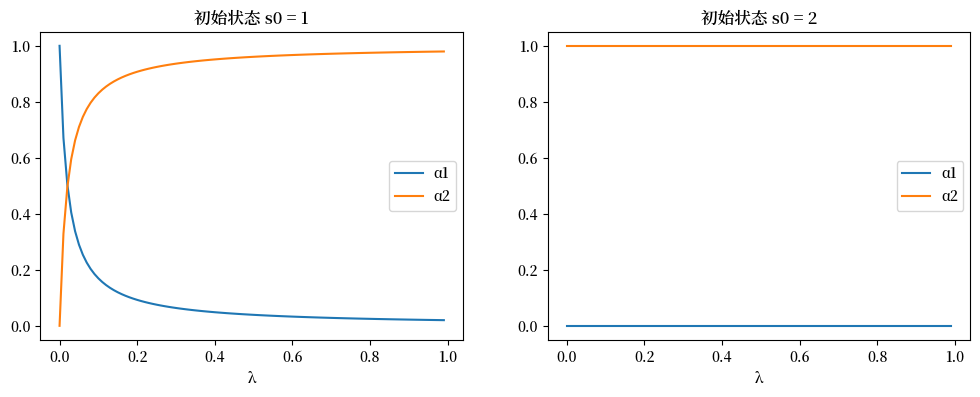

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

for i, αs_seq in enumerate([αs0_seq, αs1_seq]):
    for j in range(2):
        axs[i].plot(λ_seq, αs_seq[:, j], label=f'α{j+1}')
        axs[i].set_xlabel('λ')
        axs[i].set_title(f'初始状态 s0 = {s[i]}')
        axs[i].legend()

plt.show()

### 示例 4

In [31]:
# 维度
K, n = 2, 3

# 状态
s = np.array([1, 2, 3])

# 转移
λ = .9
μ = .9
δ = .05

# 繁荣、适中和衰退状态
P = np.array([[1-λ, λ, 0], [μ/2, μ, μ/2], [(1-δ)/2, (1-δ)/2, δ]])

# 禀赋
ys = np.empty((n, K))
ys[:, 0] = [.25, .75, .2]       # y1
ys[:, 1] = [1.25, .25, .2]      # y2

In [32]:
ex4 = RecurCompetitive(s, P, ys)

In [33]:
# 禀赋
print("ys = \n", ex4.ys)

# 定价核
print ("Q = \n", ex4.Q)

# 无风险利率 R
print("R = ", ex4.R)

# 自然债务限制, A = [A1, A2, ..., AI]
print("A = \n", ex4.A)

print('')

for i in range(1, 4):
    # 当初始状态为状态i时
    print(f"当初始状态为状态 {i}")
    print(f'α = {ex4.wealth_distribution(s0_idx=i-1)}')
    print(f'ψ = \n{ex4.continuation_wealths()}')
    print(f'J = \n{ex4.value_functionss()}\n')

ys = 
 [[0.25 1.25]
 [0.75 0.25]
 [0.2  0.2 ]]
Q = 
 [[0.098      1.08022498 0.        ]
 [0.36007499 0.882      0.69728222]
 [0.24038317 0.29440805 0.049     ]]
R =  [1.43172499 0.44313807 1.33997564]
A = 
 [[-1.4141307  -0.45854174]
 [-1.4122483  -1.54005386]
 [-0.58434331 -0.3823659 ]]

当初始状态为状态 1
α = [0.75514045 0.24485955]
ψ = 
[[[ 0.          0.        ]
  [-0.81715447  0.81715447]
  [-0.14565791  0.14565791]]]
J = 
[[[-2.65741909 -1.51322919]
  [-5.13103133 -2.92179221]
  [-2.65649938 -1.51270548]]]

当初始状态为状态 2
α = [0.47835493 0.52164507]
ψ = 
[[[ 0.5183286  -0.5183286 ]
  [ 0.         -0.        ]
  [ 0.12191319 -0.12191319]]]
J = 
[[[-2.11505328 -2.20868477]
  [-4.08381377 -4.26460049]
  [-2.11432128 -2.20792037]]]

当初始状态为状态 3
α = [0.60446648 0.39553352]
ψ = 
[[[ 0.28216299 -0.28216299]
  [-0.37231938  0.37231938]
  [ 0.         -0.        ]]]
J = 
[[[-2.37756442 -1.92325926]
  [-4.59067883 -3.71349163]
  [-2.37674158 -1.92259365]]]



### 有限期限示例

我们现在重新审视示例1中定义的经济，但将时间期限设为$T=10$。

In [34]:
# 维度
K, n = 2, 2

# 状态
s = np.array([0, 1])

# 转移矩阵
P = np.array([[.5, .5], [.5, .5]])

# 禀赋
ys = np.empty((n, K))
ys[:, 0] = 1 - s       # y1
ys[:, 1] = s           # y2

In [35]:
ex1_finite = RecurCompetitive(s, P, ys, T=10)

In [36]:
# (I + Q + Q^2 + ... + Q^T)
ex1_finite.V[-1]

array([[5.48171623, 4.48171623],
       [4.48171623, 5.48171623]])

In [37]:
# 禀赋
ex1_finite.ys

array([[1., 0.],
       [0., 1.]])

In [38]:
# 定价核
ex1_finite.Q

array([[0.49, 0.49],
       [0.49, 0.49]])

In [39]:
# 无风险利率 R
ex1_finite.R

array([1.02040816, 1.02040816])

在有限时间范围的情况下，`ψ`和`J`以序列形式返回。

各组成部分按照从$t=T$到$t=0$的顺序排列。

In [40]:
# 当初始状态为状态2时
print(f'α = {ex1_finite.wealth_distribution(s0_idx=0)}')
print(f'ψ = \n{ex1_finite.continuation_wealths()}\n')
print(f'J = \n{ex1_finite.value_functionss()}')

α = [0.55018351 0.44981649]
ψ = 
[[[-0.44981649  0.44981649]
  [ 0.55018351 -0.55018351]]

 [[-0.40063665  0.40063665]
  [ 0.59936335 -0.59936335]]

 [[-0.35244041  0.35244041]
  [ 0.64755959 -0.64755959]]

 [[-0.30520809  0.30520809]
  [ 0.69479191 -0.69479191]]

 [[-0.25892042  0.25892042]
  [ 0.74107958 -0.74107958]]

 [[-0.21355851  0.21355851]
  [ 0.78644149 -0.78644149]]

 [[-0.16910383  0.16910383]
  [ 0.83089617 -0.83089617]]

 [[-0.12553824  0.12553824]
  [ 0.87446176 -0.87446176]]

 [[-0.08284397  0.08284397]
  [ 0.91715603 -0.91715603]]

 [[-0.04100358  0.04100358]
  [ 0.95899642 -0.95899642]]

 [[-0.          0.        ]
  [ 1.         -1.        ]]]

J = 
[[[ 1.48348712  1.3413672 ]
  [ 1.48348712  1.3413672 ]]

 [[ 2.9373045   2.65590706]
  [ 2.9373045   2.65590706]]

 [[ 4.36204553  3.94415611]
  [ 4.36204553  3.94415611]]

 [[ 5.75829174  5.20664019]
  [ 5.75829174  5.20664019]]

 [[ 7.12661302  6.44387459]
  [ 7.12661302  6.44387459]]

 [[ 8.46756788  7.6563643 ]
  [ 8

In [41]:
# 当初始状态为状态2时
print(f'α = {ex1_finite.wealth_distribution(s0_idx=1)}')
print(f'ψ = \n{ex1_finite.continuation_wealths()}\n')
print(f'J = \n{ex1_finite.value_functionss()}')

α = [0.44981649 0.55018351]
ψ = 
[[[-0.55018351  0.55018351]
  [ 0.44981649 -0.44981649]]

 [[-0.59936335  0.59936335]
  [ 0.40063665 -0.40063665]]

 [[-0.64755959  0.64755959]
  [ 0.35244041 -0.35244041]]

 [[-0.69479191  0.69479191]
  [ 0.30520809 -0.30520809]]

 [[-0.74107958  0.74107958]
  [ 0.25892042 -0.25892042]]

 [[-0.78644149  0.78644149]
  [ 0.21355851 -0.21355851]]

 [[-0.83089617  0.83089617]
  [ 0.16910383 -0.16910383]]

 [[-0.87446176  0.87446176]
  [ 0.12553824 -0.12553824]]

 [[-0.91715603  0.91715603]
  [ 0.08284397 -0.08284397]]

 [[-0.95899642  0.95899642]
  [ 0.04100358 -0.04100358]]

 [[-1.          1.        ]
  [ 0.         -0.        ]]]

J = 
[[[ 1.3413672   1.48348712]
  [ 1.3413672   1.48348712]]

 [[ 2.65590706  2.9373045 ]
  [ 2.65590706  2.9373045 ]]

 [[ 3.94415611  4.36204553]
  [ 3.94415611  4.36204553]]

 [[ 5.20664019  5.75829174]
  [ 5.20664019  5.75829174]]

 [[ 6.44387459  7.12661302]
  [ 6.44387459  7.12661302]]

 [[ 7.6563643   8.46756788]
  [ 7

我们可以检验当 $T \rightarrow \infty$ 时，有限期限的结果是否收敛到无限期限的结果。

In [42]:
ex1_large = RecurCompetitive(s, P, ys, T=10000)
ex1_large.wealth_distribution(s0_idx=1)

array([0.49, 0.51])

In [43]:
ex1.V, ex1_large.V[-1]

(array([[[25.5, 24.5],
         [24.5, 25.5]]]),
 array([[25.5, 24.5],
        [24.5, 25.5]]))

In [44]:
ex1_large.continuation_wealths()
ex1.ψ, ex1_large.ψ[-1]

(array([[[-1.,  1.],
         [ 0., -0.]]]),
 array([[-1.,  1.],
        [ 0., -0.]]))

In [45]:
ex1_large.value_functionss()
ex1.J, ex1_large.J[-1]

(array([[[70.        , 71.41428429],
         [70.        , 71.41428429]]]),
 array([[70.        , 71.41428429],
        [70.        , 71.41428429]]))